In [12]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Embedding, LSTM, SimpleRNN, Dense
from keras.optimizers import RMSprop


In [13]:
max_features = 1000 #slowa w slowniku
maxlen = 500 #dlugosc recenzji max
batch_size=128
epochs = 10
validation_split=0.2

In [14]:
#zaladowanie imdb
(X_train, y_train), (X_test, y_test)= imdb.load_data(num_words=max_features)

In [15]:
#przygotowanie inputu
X_train=sequence.pad_sequences(X_train, maxlen=maxlen)
X_test=sequence.pad_sequences(X_test, maxlen=maxlen)

In [21]:
#model
def build_model(rnn_layers):

      model=Sequential()
      model.add(Embedding(max_features,32))
      model.add(rnn_layers)
      model.add(Dense(1,activation='sigmoid'))
      #kompilacja
      model.compile(optimizer=RMSprop(),loss='binary_crossentropy',  metrics=['accuracy'])
      #trenowanie
      history=model.fit(X_train,y_train,
                        epochs=10,
                        batch_size=batch_size,
                        validation_split=validation_split)
      return history


In [22]:
#trenowanie modelu LSTM
history_lstm=build_model(LSTM(32))

Epoch 1/10
157/157 [==============================] - 93s 576ms/step - loss: 0.6346 - accuracy: 0.6287 - val_loss: 0.4919 - val_accuracy: 0.7662
Epoch 2/10
157/157 [==============================] - 71s 453ms/step - loss: 0.4290 - accuracy: 0.8112 - val_loss: 0.3938 - val_accuracy: 0.8350
Epoch 3/10
157/157 [==============================] - 73s 468ms/step - loss: 0.3723 - accuracy: 0.8439 - val_loss: 0.3737 - val_accuracy: 0.8470
Epoch 4/10
157/157 [==============================] - 80s 513ms/step - loss: 0.3524 - accuracy: 0.8509 - val_loss: 0.3818 - val_accuracy: 0.8348
Epoch 5/10
157/157 [==============================] - 73s 463ms/step - loss: 0.3392 - accuracy: 0.8594 - val_loss: 0.4817 - val_accuracy: 0.8288
Epoch 6/10
157/157 [==============================] - 58s 369ms/step - loss: 0.3280 - accuracy: 0.8649 - val_loss: 0.3327 - val_accuracy: 0.8590
Epoch 7/10
157/157 [==============================] - 57s 361ms/step - loss: 0.3211 - accuracy: 0.8687 - val_loss: 0.3440 - val_ac

In [23]:
#trenowanie modelu SimpleRnn
history_rnn=build_model(SimpleRNN(32))

Epoch 1/10
157/157 [==============================] - 30s 183ms/step - loss: 0.6134 - accuracy: 0.6518 - val_loss: 0.5491 - val_accuracy: 0.7268
Epoch 2/10
157/157 [==============================] - 30s 189ms/step - loss: 0.5727 - accuracy: 0.7376 - val_loss: 0.4290 - val_accuracy: 0.8136
Epoch 3/10
157/157 [==============================] - 27s 170ms/step - loss: 0.4034 - accuracy: 0.8270 - val_loss: 0.4010 - val_accuracy: 0.8250
Epoch 4/10
157/157 [==============================] - 27s 170ms/step - loss: 0.3792 - accuracy: 0.8396 - val_loss: 0.4142 - val_accuracy: 0.8136
Epoch 5/10
157/157 [==============================] - 27s 174ms/step - loss: 0.3669 - accuracy: 0.8444 - val_loss: 0.4156 - val_accuracy: 0.8226
Epoch 6/10
157/157 [==============================] - 27s 171ms/step - loss: 0.3478 - accuracy: 0.8550 - val_loss: 0.4085 - val_accuracy: 0.8224
Epoch 7/10
157/157 [==============================] - 27s 171ms/step - loss: 0.3257 - accuracy: 0.8650 - val_loss: 0.4128 - val_ac

=> Model SimpleRNN po 10 epoce osiągnął wyższą dokładnośc niż model LSTM, jednak ta różnica jest bardzo niewielka około 0.01 wartości. Lepiej również wypadła strata, bo osiągmęła niższą wartośc. W przypadku wartości walidacyjnych natomiast mniejszą stratę osiągnął model lstm przy wyzszej dokładności.

In [24]:
#wykresy
def plot_history(history,title):
    history_dict=history.history
    acc=history_dict['accuracy']
    val_acc=history_dict['val_accuracy']
    loss=history_dict['loss']
    val_loss=history_dict['val_loss']

    epochs=range(1,len(acc)+1)

    plt.figure(figsize=(14,5))
    plt.subplot(1,2,1)
    plt.plot(epochs,acc,'bo',label='dokladnosc treningowa')
    plt.plot(epochs,val_acc,'b',label='dokladnosc walidacyjna')
    plt.title('dokladnosc treningowa i walidacyjna')
    plt.xlabel('epoki')
    plt.ylabel('dokladnosc')
    plt.legend()

    plt.figure()

    plt.subplot(1,2,2)
    plt.plot(epochs,loss,'bo',label='treningowa strata')
    plt.plot(epochs,val_loss,'b',label='walidacyjna strata')
    plt.title('strata treningowa i walidacyjna')
    plt.xlabel('epoki')
    plt.ylabel('strata')
    plt.legend()

    plt.show()



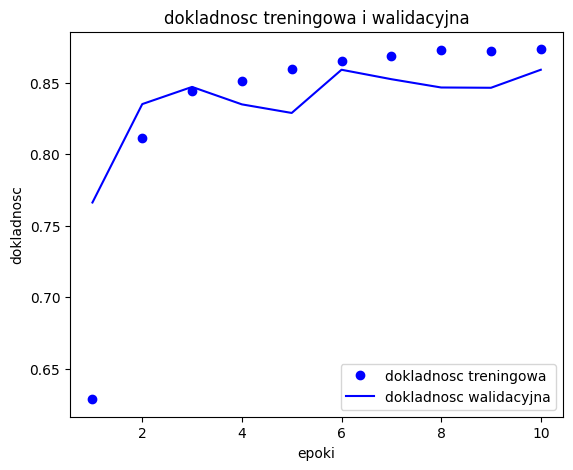

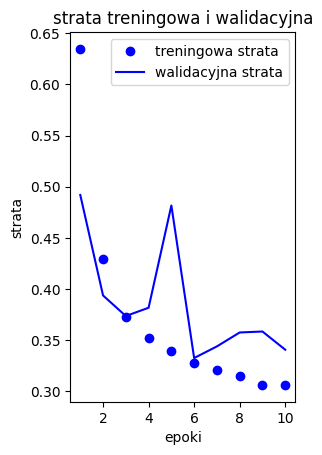

In [25]:
#dla lstm
plot_history(history_lstm, 'LSTM')


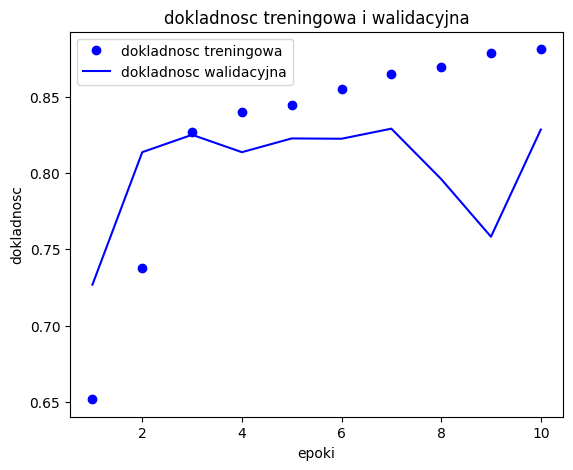

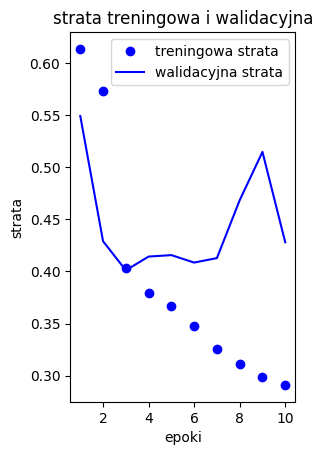

In [26]:
#dla rnn
plot_history(history_rnn,'SimpleRNN')

=> Patrząc na same wykresy można dostrzec, że w przypadku dokładności treningowej i walidacyjnej, większe różnice pomiędzy nimi występują w przypadku modelu SimpleRNN (przy 9 epoce następuje dość duży spadek wartości dokładności walidacyjnej, przy jednoczesnym ciągłym wzroście wartości dokładności treningowej). Dokładności w modelu LSTM w miarę się pokrywają w większości rozpatrywanych epok (przybierają podobne wielkości).
Porównując teraz straty, można zauważyć ciekawe zjawisko nagłego wzrostu straty walidacyjnej w modelu LSTM na epoce 5, a modelu SimpleRNN dopiero na epoce 10. Wartość treningowa straty w obu przypadkach stale maleje, osiągając coraz to niższe wartości.

Podsumowując:
-model lstm dobrze radzi sobie z generalizacją na danych walidacyjnych, dobrze zatem sprawdzi sie w pracy z różnorodnymi danymi
-dostrzegalne niewielkie róznice w dokładności treningowej i walidacyjnej modelu lstm może świadczyć o mniejszej tendencji do przeuczenia modelu.
-model simpleRNN cechuje się już większymi różnicami w uzyskiwanych dokładnościach (treningowym i walidacyjnym), szczególnie na późniejszych epokach
-model simplernn może wskazywać oznaki przeuczenia w większym stopniu niż lstm